In [19]:
import numpy as np
from skimage.io import imread
from matplotlib import pyplot as plt
import math
import time
import matplotlib.pyplot as plt


## Blatt 06, Aufg 02

Aufg 2.1
Laden der Bilder und ...

In [20]:
# Laden der Bilder
image1 = imread('./bildverbesserungWK06/bild1.png')
image3 = imread('./bildverbesserungWK06/bild3.png')

# Berechnung des Histogramms
hist1, bins1 = np.histogram(image1.flatten(), bins=256, range=[0, 256], density=True)
hist3, bins3 = np.histogram(image3.flatten(), bins=256, range=[0, 256], density=True)


Plotten der Bidler

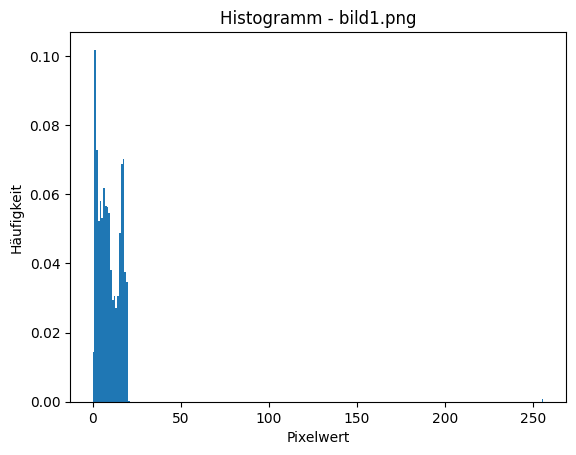

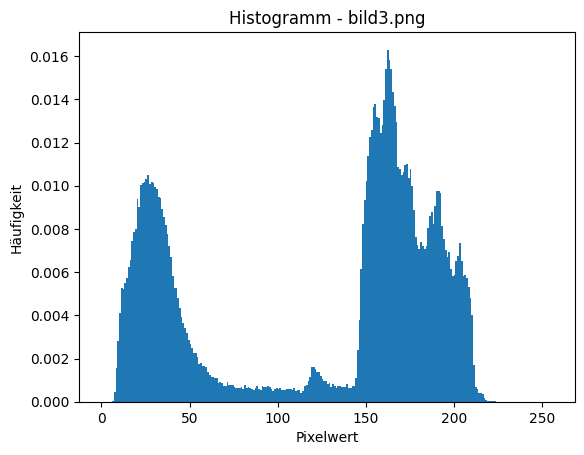

In [21]:
# Plotting des Histogramms für bild1.png
plt.figure()
plt.hist(image1.flatten(), bins=256, range=[0, 256], density=True)
plt.title("Histogramm - bild1.png")
plt.xlabel("Pixelwert")
plt.ylabel("Häufigkeit")
plt.show()

# Plotting des Histogramms für bild3.png
plt.figure()
plt.hist(image3.flatten(), bins=256, range=[0, 256], density=True)
plt.title("Histogramm - bild3.png")
plt.xlabel("Pixelwert")
plt.ylabel("Häufigkeit")
plt.show()


## Aufg 2.2 

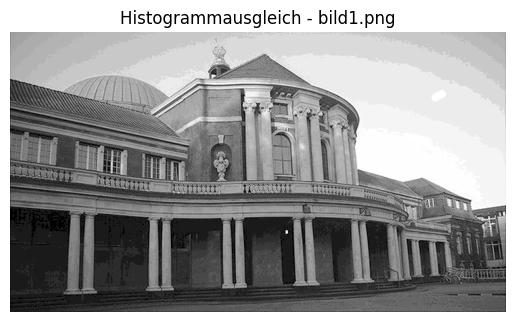

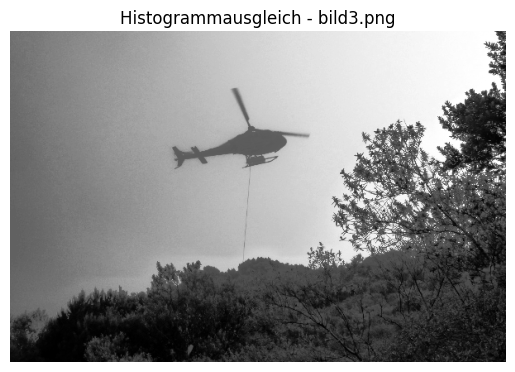

In [22]:


def histogram_equalization(image):
    # Berechnung des Histogramms
    hist, bins = np.histogram(image.flatten(), bins=256, range=[0, 256], density=True)
    
    # Berechnung der kumulativen Verteilungsfunktion (CDF)
    cdf = hist.cumsum()
    
    # Berechnung der Transformationsfunktion T(n)
    T = (cdf * 255).astype(np.uint8)
    
    # Anwendung der Transformationsfunktion auf das Bild
    equalized_image = T[image]
    
    return equalized_image

# Laden der Bilder
image1 = imread('./bildverbesserungWK06/bild1.png')
image3 = imread('./bildverbesserungWK06/bild3.png')


# Histogrammausgleich für bild1.png
equalized_image1 = histogram_equalization(image1)

# Histogrammausgleich für bild3.png
equalized_image3 = histogram_equalization(image3)

# Plotting des Ergebnisbildes für bild1.png
plt.figure()
plt.imshow(equalized_image1, cmap='gray')
plt.title("Histogrammausgleich - bild1.png")
plt.axis('off')
plt.show()

# Plotting des Ergebnisbildes für bild3.png
plt.figure()
plt.imshow(equalized_image3, cmap='gray')
plt.title("Histogrammausgleich - bild3.png")
plt.axis('off')
plt.show()


## Aufg 2.3

Bild 1


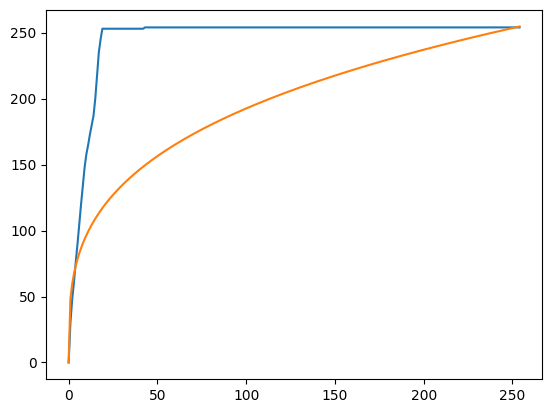

Bild 3


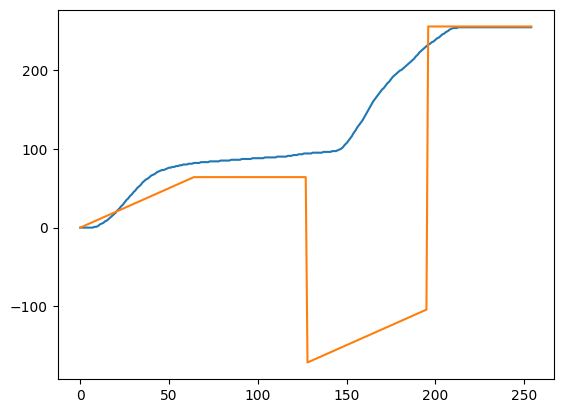

In [23]:
def get_normalized_histo(img):
    return np.histogram(img, bins=255, range =(0,255),density=True)

mapping = [2,5,3,5,6]

def plot_mapping(img,f):
    histo_norm=get_normalized_histo(img)[0]
    bin_size = len(histo_norm)

    sum_until = np.array([0.]*(bin_size+1))
    for i in range(1,bin_size+1):
        sum_until[i]=np.sum(np.where(np.array([x for x in range(bin_size)]) <= i, histo_norm,0))

    mapping = np.round((bin_size-1)*np.take(sum_until,[x for x in range(bin_size)]))

    plt.figure(1)
    plt.plot(range(len(mapping)),mapping)
    plt.plot(range(len(mapping)), list(map(f,range(len(mapping)))))

    plt.show()

print("Bild 1")
plot_mapping(image1,lambda x: 255*((x/255)**0.3))


def f3(x):
    if x <64:
        return x
    if x >= 64 and x <128:
        return 64
    if x >= 128 and x < 196:
        return x-128/(195-128)*(254-64)+64
    if x >= 196:
        return 255

print("Bild 3")
plot_mapping(image3,f3)



## Vergleich:
Die beiden orangenen Linien sind Funktionen aus der Musterlösung Blatt 04.
Die beiden blauen Linien sind Kontrastspreizungen.

Zu Bild 1: dunkle Werte werden zu weiß (blaue Linie)

Zu Bild 3: die orangene Linie aus Bild 3 ist eine Intensity-level slicing Funktion
und blaue Linie ist eine leichte Kontrastinvertierung.
